In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
%matplotlib inline


/tmp/ipykernel_23376/2650694575.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
titanic = pd.read_excel("../data/titanic.xls")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


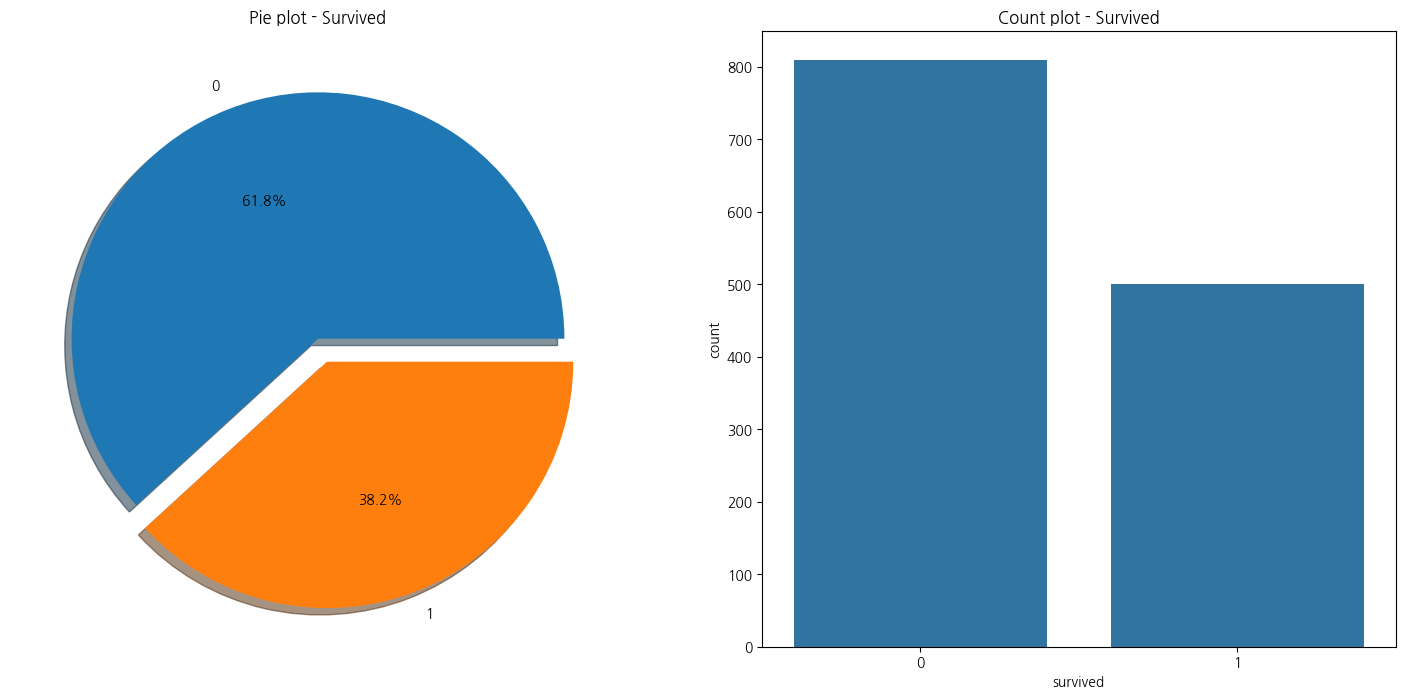

In [3]:
f, ax = plt.subplots(1,2, figsize=(18,8))

titanic['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

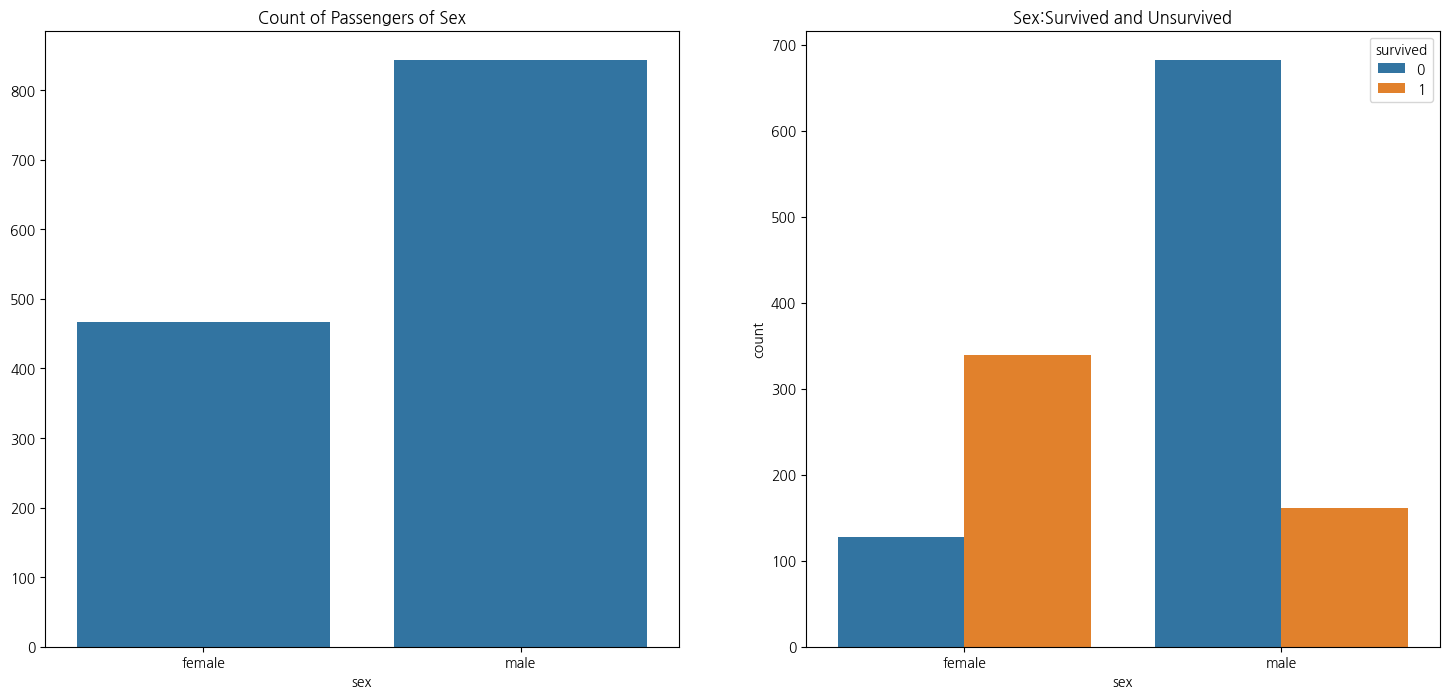

In [4]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

In [5]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


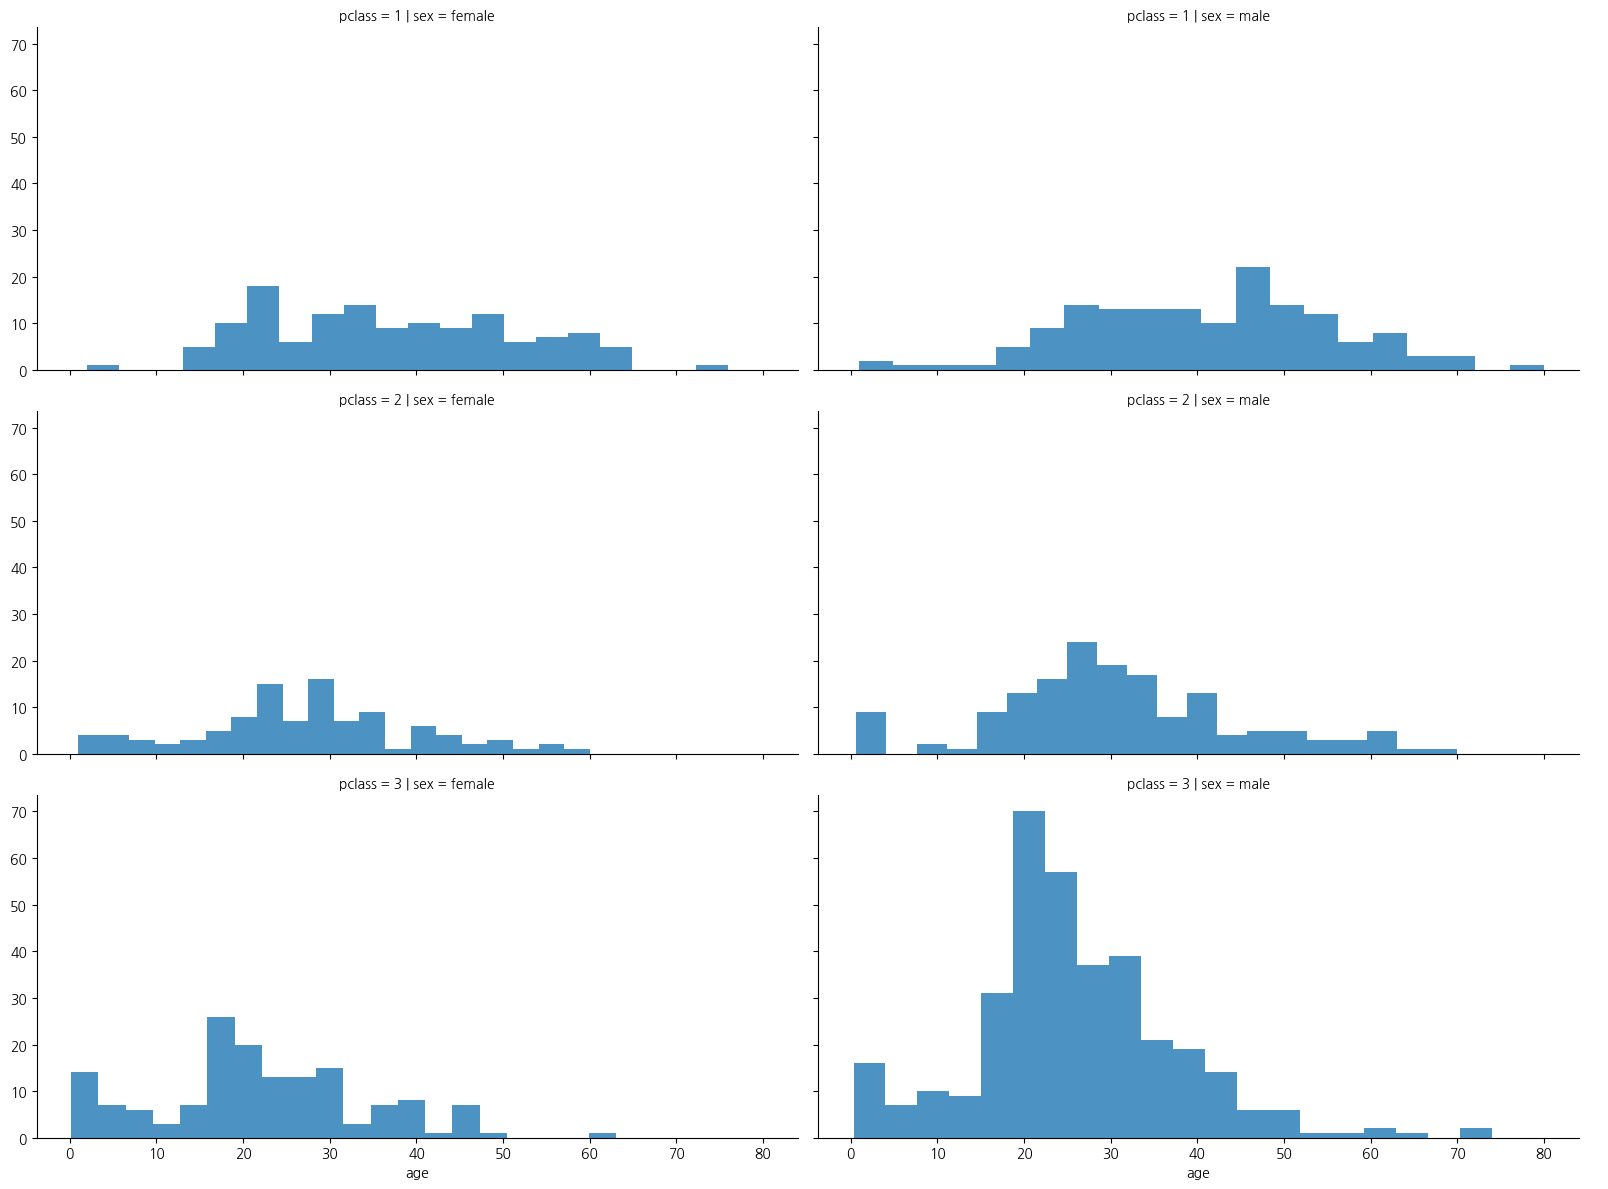

In [6]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend();

In [7]:
import plotly.express as px
fig = px.histogram(titanic, x="age")
fig.show()

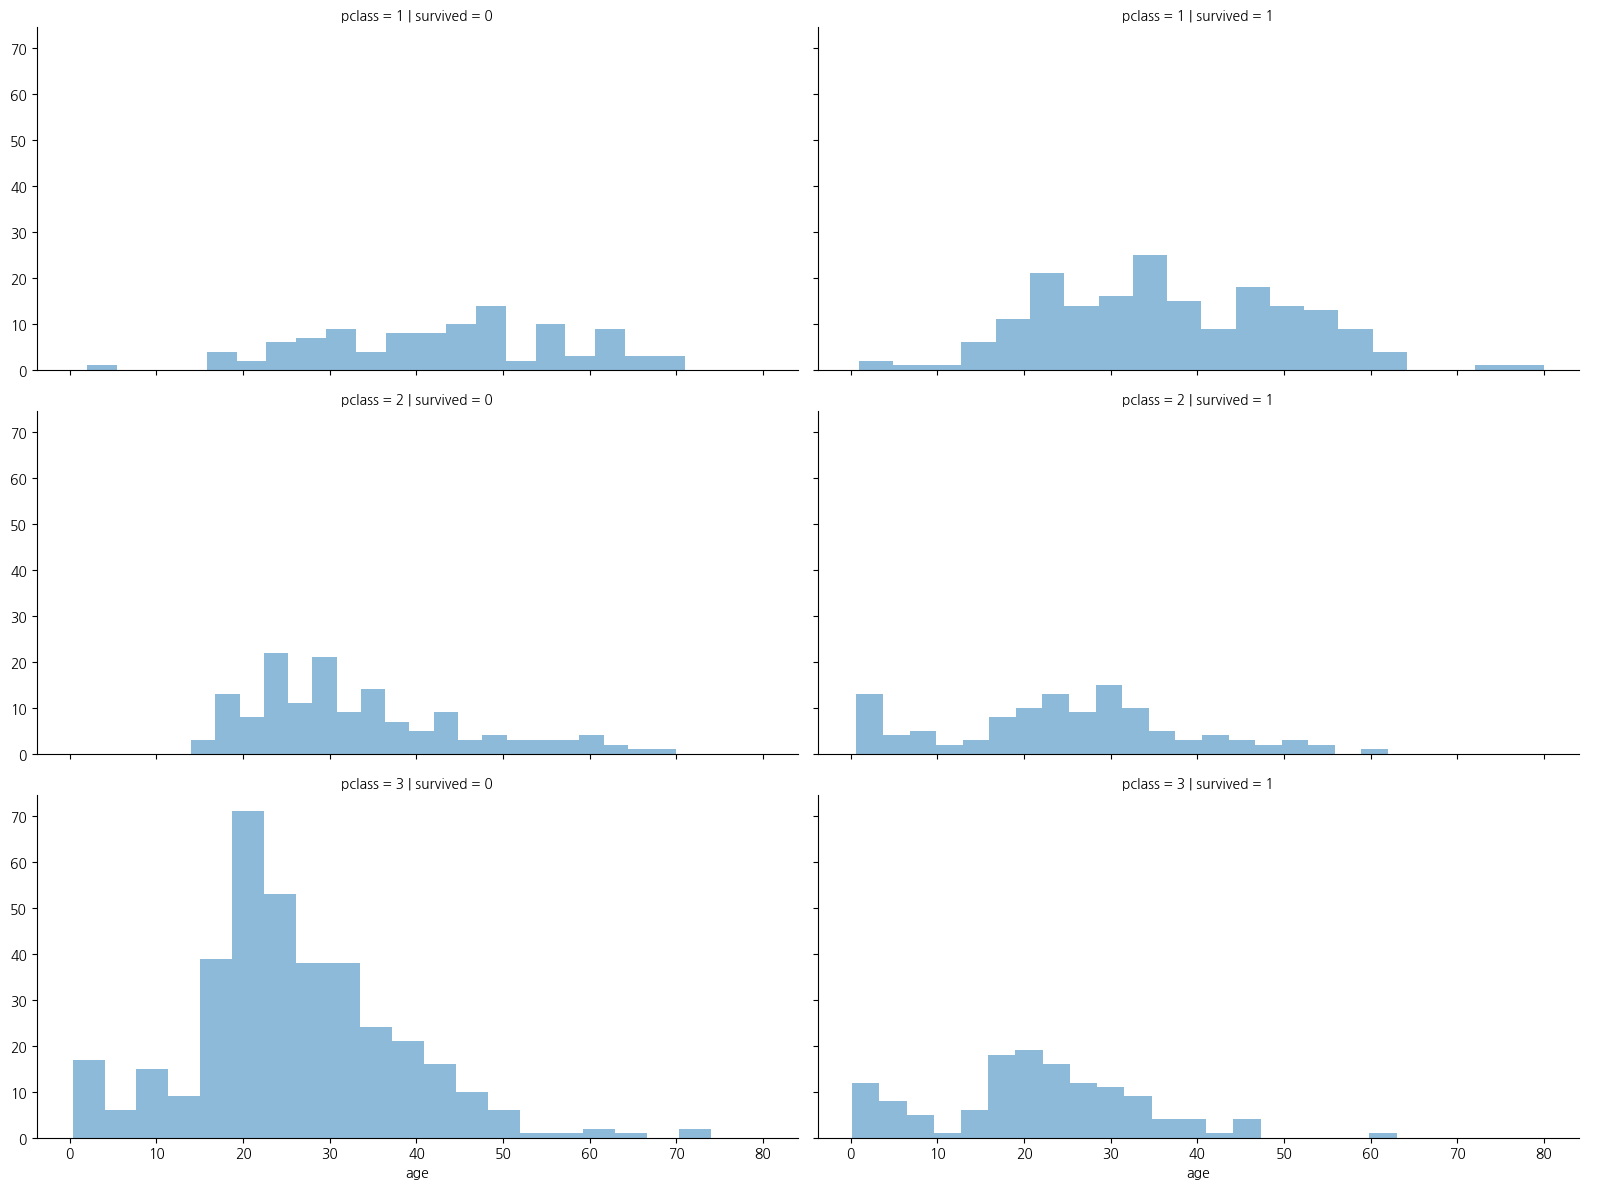

In [8]:
grid=sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [9]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                            include_lowest=True,
                            labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


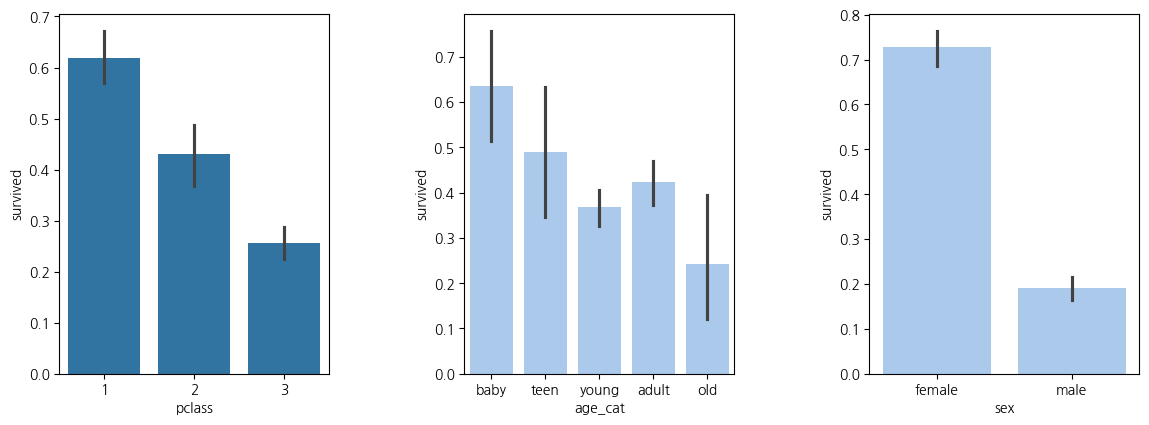

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.set_palette("pastel")
sns.barplot(x='pclass', y='survived', data=titanic)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

/tmp/ipykernel_23376/3233899930.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_23376/3233899930.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_23376/3233899930.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

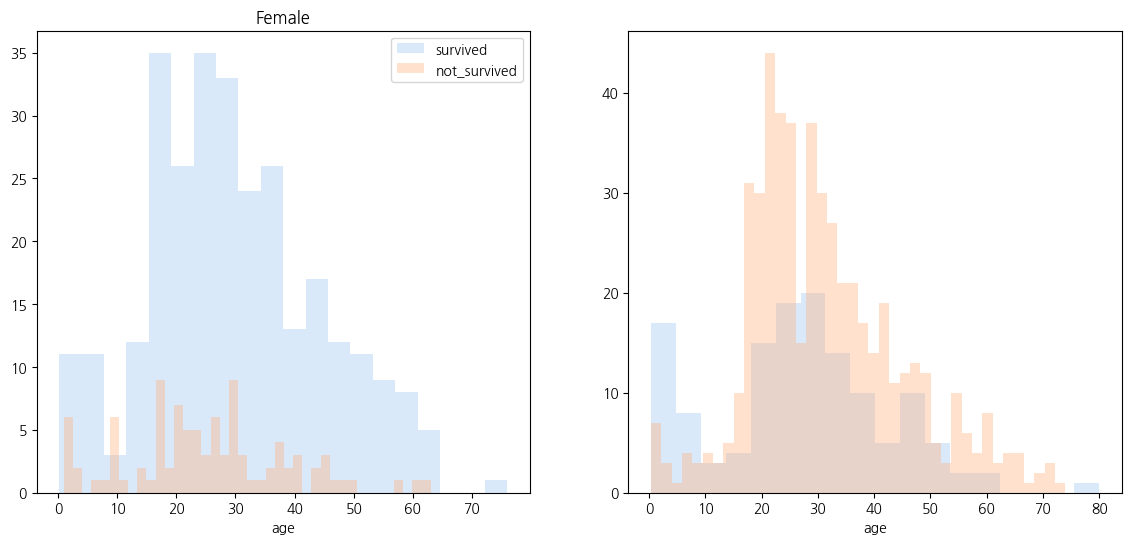

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax=sns.distplot(women[women['survived']==1]['age'], bins=20,
                label = 'survived', ax=axes[0], kde=False)

ax=sns.distplot(women[women['survived']==0]['age'], bins=40,
                label = 'not_survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax=sns.distplot(men[men['survived']==1]['age'], bins=18,
                label = 'survived', ax=axes[1], kde=False)

ax=sns.distplot(men[men['survived']==0]['age'], bins=40,
                label = 'not_survived', ax=axes[1], kde=False)

In [12]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx)
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())
    

0
, Miss.
1
, Master.
2
, Miss.
3
, Mr.
4
, Mrs.
5
, Mr.
6
, Miss.
7
, Mr.
8
, Mrs.
9
, Mr.
10
, Col.
11
, Mrs.
12
, Mme.
13
, Miss.
14
, Mr.
15
, Mr.
16
, Mr.
17
, Mrs.
18
, Miss.
19
, Mr.
20
, Mr.
21
, Mrs.
22
, Mr.
23
, Miss.
24
, Miss.
25
, Mr.
26
, Mr.
27
, Mrs.
28
, Miss.
29
, Mr.
30
, Mr.
31
, Mr.
32
, Miss.
33
, Miss.
34
, Mr.
35
, Miss.
36
, Miss.
37
, Mr.
38
, Mr.
39
, Mr.
40
, Dr.
41
, Mrs.
42
, Mrs.
43
, Mrs.
44
, Miss.
45
, Major.
46
, Mr.
47
, Mr.
48
, Mrs.
49
, Mr.
50
, Mrs.
51
, Mr.
52
, Mr.
53
, Mr.
54
, Master.
55
, Miss.
56
, Mr.
57
, Mrs.
58
, Mr.
59
, Mrs.
60
, Mr.
61
, Mrs.
62
, Mr.
63
, Mrs.
64
, Mr.
65
, Mrs.
66
, Miss.
67
, Miss.
68
, Mr.
69
, Mrs.
70
, Mr.
71
, Mr.
72
, Mrs.
73
, Miss.
74
, Mr.
75
, Mr.
76
, Miss.
77
, Mr.
78
, Mrs.
79
, Mrs.
80
, Mr.
81
, Capt.
82
, Miss.
83
, Mrs.
84
, Mr.
85
, Mrs.
86
, Mr.
87
, Mr.
88
, Miss.
89
, Mr.
90
, Mrs.
91
, Mr.
92
, Mrs.
93
, Dr.
94
, Master.
95
, Mrs.
96
, Mr.
97
, Mrs.
98
, Mrs.
99
, Lady.
100
, Sir.
101
, Mr.
1

In [13]:
title = [] 
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title']=title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [14]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [18]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']

Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')
    
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f', 'the Countess'],
      dtype=object)

In [19]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.600000
4,Rare_m,0.443038
5,the Countess,1.000000
